# ns-3 test results
This notebook takes results from the ns3 tests and plots them.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import re

[]

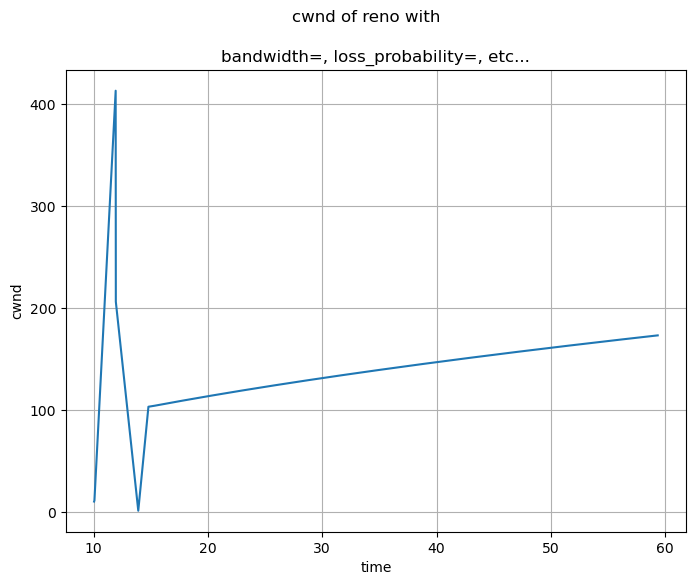

In [12]:
#configure before plotting
filename = "reno0.dat"
save_figure = True


# read file and convert to numpy
data = np.loadtxt(f'./ns3_results/{filename}')
# plot data
fig, axs = plt.subplots(1, 1, figsize=(8,6))
axs.plot(data[:,0],data[:,1])
axs.set_xlabel("time")
axs.set_ylabel("cwnd")
axs.grid()
axs.set_title("bandwidth=, loss_probability=, etc...")
fig.suptitle("cwnd of reno with")
if save_figure:
    plt.savefig(f"./figures/ns3_results/{filename}.png")
plt.plot()

[]

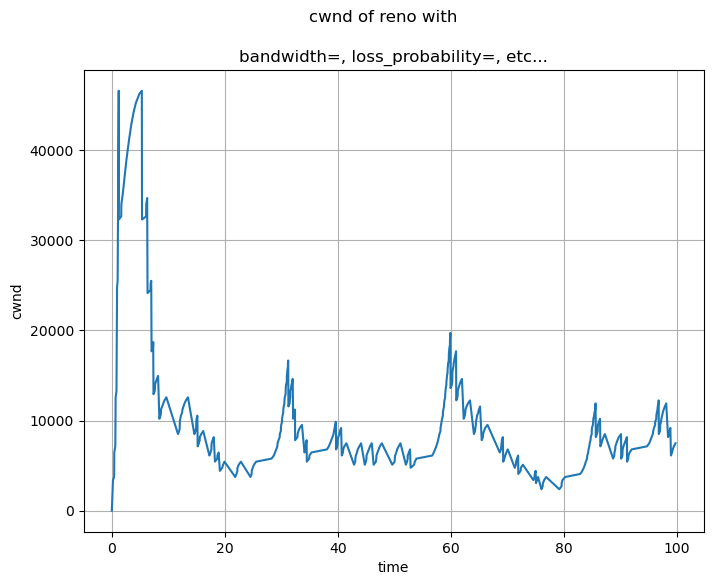

In [25]:
#configure before plotting
filename = "TcpCubic0_005000-100ms-loss-cwnd.data"
save_figure = False

# read file and convert to numpy
data = np.loadtxt(f'./ns3_results/{filename}')
# plot data
fig, axs = plt.subplots(1, 1, figsize=(8,6))
axs.plot(data[:,0],data[:,1])
axs.set_xlabel("time")
axs.set_ylabel("cwnd")
axs.grid()
axs.set_title("bandwidth=, loss_probability=, etc...")
fig.suptitle("cwnd of reno with")
if save_figure:
    plt.savefig(f"./figures/ns3_results/{filename}.png")
plt.plot()

[]

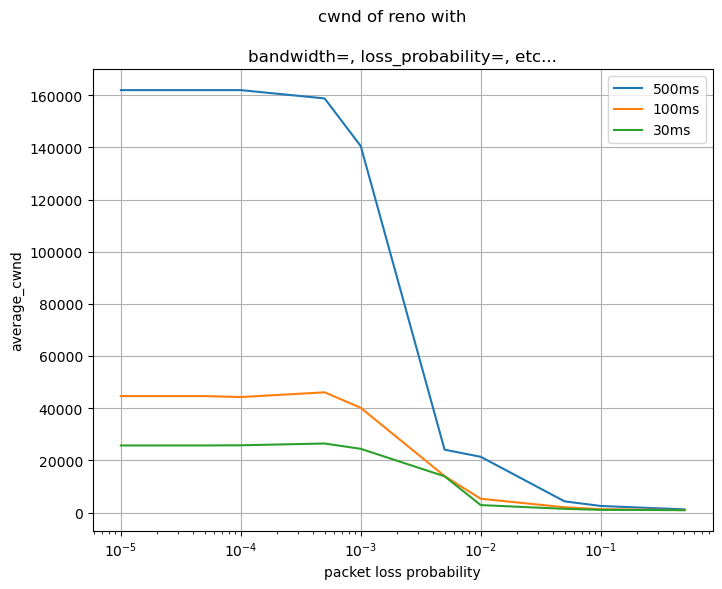

In [19]:
error_ps = ["0.500000","0.100000","0.050000","0.010000","0.005000","0.001000","0.000500","0.000100","0.000050","0.000010"]
error_ps_int = [0.500000,0.100000,0.050000,0.010000,0.005000,0.001000,0.000500,0.000100,0.000050,0.000010]
averages = np.zeros((len(error_ps),3))
# plot data
fig, axs = plt.subplots(1, 1, figsize=(8,6))
for i,e in enumerate(error_ps):
    e = e.replace('.','_')
    for j,rtt in enumerate([500,100,30]):
        filename = "TcpCubic"+e+"-"+str(rtt)+"ms-loss-cwnd.data"
        data = np.loadtxt(f'./ns3_results/{filename}')
        averages[i,j] = np.average(data[:,1])
axs.semilogx(error_ps_int,averages[:,0],label="500ms")
axs.semilogx(error_ps_int,averages[:,1],label="100ms")
axs.semilogx(error_ps_int,averages[:,2],label="30ms")
axs.set_xlabel("packet loss probability")
axs.set_ylabel("average_cwnd")
axs.grid()
axs.set_title("bandwidth=, loss_probability=, etc...")
axs.legend()
fig.suptitle("cwnd of reno with")
if save_figure:
    plt.savefig(f"./figures/ns3_results/{filename}.png")
plt.plot()

[]

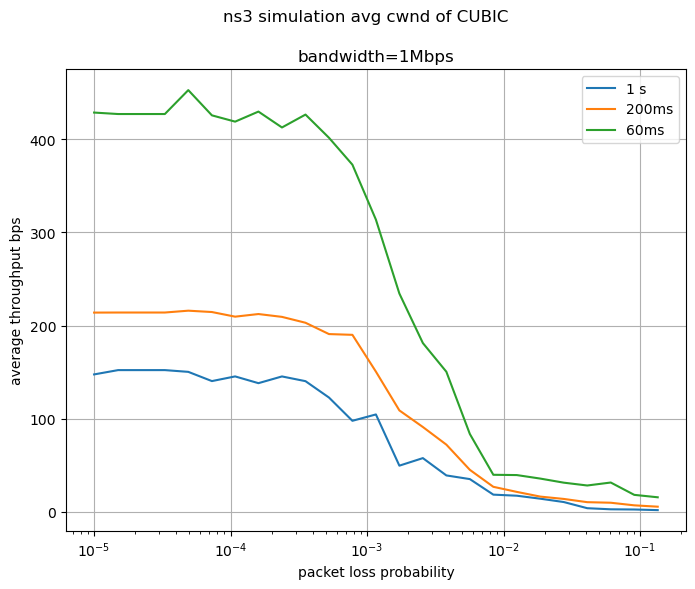

In [45]:
fig, axs = plt.subplots(1, 1, figsize=(8,6))
folder_path = "./ns3_results/cubic/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500 = {}
average_100 = {}
average_30 = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0_(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+)_",filename).group(1)
    data = np.loadtxt(f'./ns3_results/cubic/{filename}')
    if rtt == "500":
        average_500[error] = np.average(data[:,1])/1/1024
    if rtt == "100":
        average_100[error] = np.average(data[:,1])/0.2/1024
    if rtt == "30":
        average_30[error] = np.average(data[:,1])/0.06/1024
average_500=dict(sorted(average_500.items()))
average_100=dict(sorted(average_100.items()))
average_30=dict(sorted(average_30.items()))
axs.semilogx(average_500.keys(),average_500.values(),label="1 s")
axs.semilogx(average_100.keys(),average_100.values(),label="200ms")
axs.semilogx(average_30.keys(),average_30.values(),label="60ms")
axs.set_xlabel("packet loss probability")
axs.set_ylabel("average throughput MSS/s")
axs.grid()
axs.set_title("bandwidth=1Mbps")
axs.legend()
fig.suptitle("ns3 simulation avg cwnd of CUBIC")
save_figure=False
if save_figure:
    plt.savefig(f"./figures/ns3_results/.png")
plt.plot()

[]

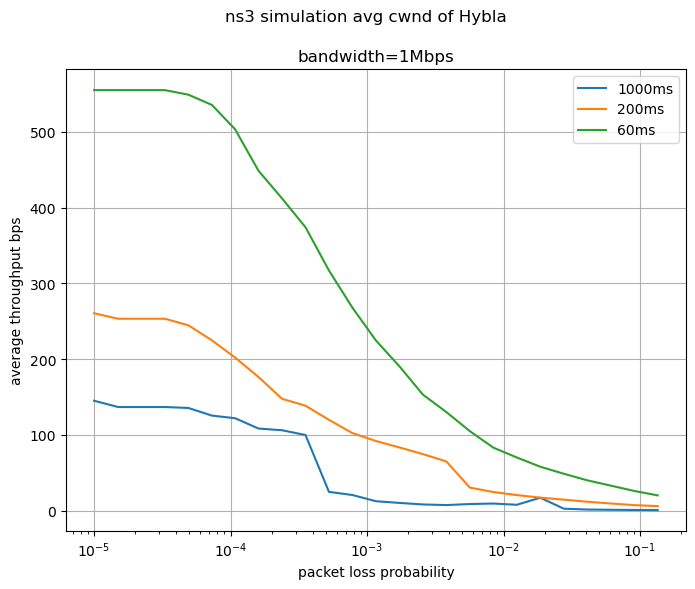

In [44]:
fig, axs = plt.subplots(1, 1, figsize=(8,6))
folder_path = "./ns3_results/Hybla/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500 = {}
average_100 = {}
average_30 = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0_(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+?)_",filename).group(1)
    data = np.loadtxt(f'./ns3_results/Hybla/{filename}')
    if rtt == "500":
        average_500[error] = np.average(data[:,1])/1/1024
    if rtt == "100":
        average_100[error] = np.average(data[:,1])/0.2/1024
    if rtt == "30":
        average_30[error] = np.average(data[:,1])/0.06/1024
average_500=dict(sorted(average_500.items()))
average_100=dict(sorted(average_100.items()))
average_30=dict(sorted(average_30.items()))
axs.semilogx(average_500.keys(),average_500.values(),label="1000ms")
axs.semilogx(average_100.keys(),average_100.values(),label="200ms")
axs.semilogx(average_30.keys(),average_30.values(),label="60ms")
axs.set_xlabel("packet loss probability")
axs.set_ylabel("average throughput MSS/s")
axs.grid()
axs.set_title("bandwidth=1Mbps")
axs.legend()
fig.suptitle("ns3 simulation avg cwnd of Hybla")
save_figure=False
if save_figure:
    plt.savefig(f"./figures/ns3_results/.png")
plt.plot()